In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
from sklearn import cluster

In [4]:
udf = pd.read_csv('../data/2nd/tianchi_mobile_recommend_train_user_filtered.csv', index_col=['user_id', 'item_id'])
u = udf.reset_index()

In [5]:
user_times_def = dict()
for h in xrange(24):
    user_times_def['h%02d'%h] = u[u.hour == h].groupby('user_id').behavior_type.size() / u.groupby('user_id').behavior_type.size()
utdf = pd.DataFrame(user_times_def).fillna(0)
utdf['label'] = [0] * len(utdf)

In [14]:
model = cluster.KMeans(n_clusters=10)
utdf['label'] = model.fit_predict(utdf.values[:, :-1])

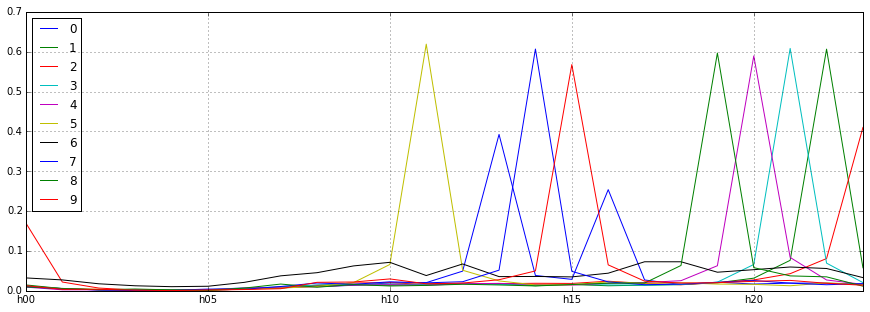

In [16]:
pd.DataFrame(model.cluster_centers_, columns=utdf.columns[:-1]).T.plot(figsize=(15, 5));

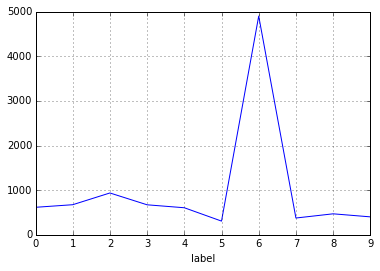

In [15]:
utdf.groupby('label').size().plot();

In [17]:
noon_df = u[u.user_id.isin(utdf[utdf.label.isin([0, 5, 7])].index)]

In [37]:
ordinary_df = u[u.user_id.isin(utdf[utdf.label.isin([6])].index)]

In [41]:
df5 = u[u.user_id.isin(utdf[utdf.label.isin([5])].index)]

In [42]:
len(df5)

13246

In [43]:
len(df5[df5.behavior_type==4])

223

In [45]:
df5.set_index(['user_id', 'item_id'])

behavior_type user_geohash  item_category  hour  \
user_id   item_id                                                      
106230218 238910858              4          NaN          12090    11   
          24538366               1          NaN           9614    12   
          238910858              1          NaN          12090    11   
          51466425               1          NaN           9614    12   
114147715 216976898              1          NaN          12090     1   
113962885 388492606              1          NaN          12090    11   
          186858570              1          NaN          12090    23   
          389216568              1          NaN          12170     7   
          389216568              1      95qc635          12170    11   
          262825085              1          NaN           7850    23   
          235502192              1          NaN           7850    23   
          239052229              1          NaN           8561    11   
          171944336              1          NaN           8561    11   
          236382754              3      95qc29e           8561    20   
          197492821              1      95qc1tm           8561    20   
          346091674              1          NaN           5273    12   
22600224  269722689              1          NaN          12370    11   
          84259565               1          NaN          12370    11   
          104623866              1          NaN          12370    11   
          280875818              1          NaN          12370    11   
135571612 386121087              1          NaN           7401    11   
          175003727              1          NaN           7401    11   
          175003727              4          NaN           7401    11   
          303903034              1          NaN           7401    13   
          36253410               1          NaN           7401    10   
          332194437              1          NaN           7401    11   
          12655599               1          NaN           7401    11   
22600224  233832391              1          NaN           3960    11   
          117547812              1          NaN           3960    11   
          41778662               1          NaN          12370    11   
...                            ...          ...            ...   ...   
14281644  76620812               1          NaN          11991    11   
48862784  98921119               1          NaN           3942    10   
          193578502              1          NaN           3942    23   
          193578502              1          NaN           3942    23   
          308320251              1          NaN           3942    10   
          366007616              1          NaN           3942    23   
          116067015              1          NaN           3942    11   
          35479235               1          NaN           3942    10   
          44421490               1          NaN           3942    11   
          208962525              3          NaN           3942    11   
          208962525              1          NaN           3942    11   
92067434  342611365              1          NaN            279    11   
49787656  361422774              1      9p0n4f7           7791    11   
          44130403               1          NaN           4864    11   
          44130403               1      9p0n4ln           4864    21   
          108017568              1          NaN          12067    13   
          44130403               2          NaN           4864    11   
          44130403               1          NaN           4864    12   
          270963063              2          NaN           3660    22   
          272747829              1          NaN           3660    11   
          189864939              1          NaN           6648    11   
          290318939              1          NaN           6648    11   
          290318939              1          NaN           664

In [38]:
len(ordinary_df)

993763

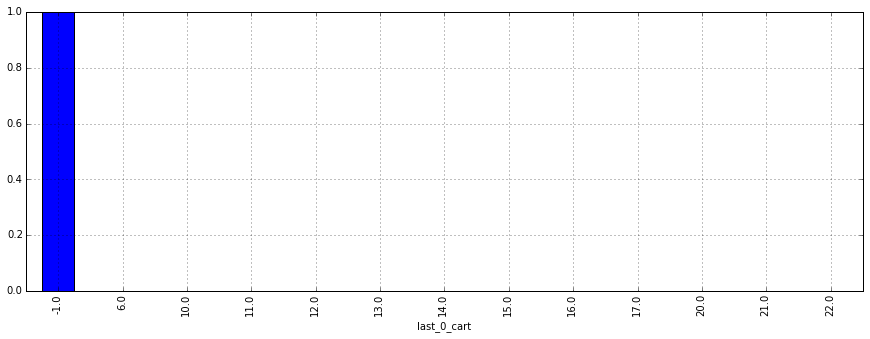

In [28]:
features_df = pd.read_csv('../data/new2/apr23_train_2014-12-05_2nd_all_2.csv')
noon_features_df = features_df[features_df.user_id.isin(utdf[utdf.label.isin([0, 5, 7])].index)]
def user_item_count(df):
    return len(df[df.cla==1][['user_id', 'item_id']].drop_duplicates())
g1 = noon_features_df.groupby('last_0_cart').apply(user_item_count)
g1.plot(kind='bar', figsize=(15, 5));

In [30]:
len(noon_features_df[noon_features_df.cla == 1])

1

In [35]:
noon_df[noon_df.behavior_type == 4].user_id.nunique()

434

In [36]:
noon_df.user_id.nunique()

1299

In [39]:
ordinary_df.user_id.nunique()

4900

In [40]:
ordinary_df[ordinary_df.behavior_type==4].user_id.nunique()

2689